# Estudios y empleabilidad (encuesta)

El Presente trabajo analiza la encuesta del dataset de https://www.kaggle.com/datasets/lainguyn123/employee-survey?select=employee_survey.csv

Dicho dataset es una encueta de trabajo a distintos públicos que muestra factores como genero, satisfacción y otros que se detallarán más adelante.

## Objetivo

El objetivo del presente trabajo es ver si el nivel de estudios (y otras variables) tienen relación con conseguir un mejor trabajo (nivel de satisfacción).

## Hipotesis

a. Mientras mayor es el nivel de estudios, mayor es el nivel de trabajo que tiene (JobLevel). <br>
b. Por políticas de igualdad de género, la diferencia entre el nivel de satisfacción entre hombres y mujeres debe ser menor a 5%. <br>
c. Los trabajos de mayor rango (JobLevel: Senior y Lider) tienen más sobretiempo en promedio.

## Limitantes

El trabajo esta enmarcado en la encuesta del dataset de https://www.kaggle.com/datasets/lainguyn123/employee-survey?select=employee_survey.csv

# Dataset

## Descripción de variables

<li>	EmpID	:	ID del empleado	.	</li>
<li>	Gender	:	Genero del empleado	.	</li>
<li>	Age	:	Edad del empleado	.	</li>
<li>	MaritalStatus	:	Estado Marital (casado, soltero, divorsiado, viudo)	.	</li>
<li>	JobLevel	:	Nivel de empleado (Interno, Junior, Semi-senior, Senieor, Lider)	.	</li>
<li>	Experience	:	Años de experiencia	.	</li>
<li>	Dept	:	Área donde trabaja	.	</li>
<li>	EmpType	:	Tipo de empleo (full-time, part-time, Contrato)	.	</li>
<li>	WLB	:	Puntuación de vida de trabajo, del 1 al 5	.	</li>
<li>	WorkEnv	:	Puntuación de ambiente laboral del 1 al 5	.	</li>
<li>	PhysicalActivityHours	:	Numero de horas de actividad física por semana.	.	</li>
<li>	Workload	:	Puntuación de carga de trabajo del 1 al 5	.	</li>
<li>	Stress	:	Puntuación de estrés en el trabajo de 1 al 5	.	</li>
<li>	SleepHours	:	Numero de horas que duerme por noche	.	</li>
<li>	CommuteMode	:	Modo de desplazamiento al trabajo (coche, transporte público, bicicleta, a pie, moto)	.	</li>
<li>	CommuteDistance	:	Distacia de desplazamiento al trabajo (en Km)	.	</li>
<li>	NumCompanies	:	Numero de diferentes compañias en el que el trabajado va trabajando	.	</li>
<li>	TeamSize	:	Tamaño del equipo al que pertenece	.	</li>
<li>	NumReports	:	Numero de trabajadores que le reportan (solo aplica a seniors y lideres)	.	</li>
<li>	EduLevel	:	Nivel de educación	.	</li>
<li>	haveOT	:	Hace horas extras (verdadero/falso)	.	</li>
<li>	TrainingHoursPerYear	:	Numero de horas de entrenamiento recibido por año	.	</li>
<li>	JobSatisfaction	:	Puntuación de satisfacción del trabajo del 1 al 5	.	</li>


# Importación de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Análisis Exploratorio

Carga del Dataframe

In [2]:
df = pd.read_csv('employee_survey.csv')

In [3]:
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


Transformar valores a Español

In [4]:
##GENDER
# Crear un diccionario para el mapeo de valores
gender_map = {
    'Male': 'Masculino',
    'Female': 'Femenino',
    'Other': 'Otros'
}
# Reemplazar los valores en la columna 'Gender'
df['Gender'] = df['Gender'].replace(gender_map)
#Imprimo valores
print(f'Gender:')
print(df['Gender'].unique())
print(f'\n')


##DEPT
# Crear un diccionario para el mapeo de valores
Dept_map = {
    'IT': 'TI',
    'Finance': 'Finanzas',
    'Sales': 'Ventas',
    'Operations': 'Operaciones',
    'Customer Service': 'Servicio al cliente',
    'HR': 'Recursos Humanos'
}
# Reemplazar los valores en la columna 'Gender'
df['Dept'] = df['Dept'].replace(Dept_map)
#Imprimo valores
print(f'Dept')
print(df['Dept'].unique())
print(f'\n')



##EmpType
# Crear un diccionario para el mapeo de valores
EmpType_map = {
    'Contract': 'Contrato'
}
# Reemplazar los valores en la columna 'Gender'
df['EmpType'] = df['EmpType'].replace(EmpType_map)
#Imprimo valores
print(f'EmpType')
print(df['EmpType'].unique())
print(f'\n')


##CommuteMode
# Crear un diccionario para el mapeo de valores
CommuteMode_map = {
    'Car': 'Carro',
    'Motorbike': 'Moto',
    'Public Transport': 'Transporte Público',
    'Bike': 'Bicicleta',
    'Walk': 'Camina'
}
# Reemplazar los valores en la columna 'Gender'
df['CommuteMode'] = df['CommuteMode'].replace(CommuteMode_map)
#Imprimo valores
print(f'CommuteMode')
print(df['CommuteMode'].unique())
print(f'\n')



##EduLevel
# Crear un diccionario para el mapeo de valores
EduLevel_map = {
    'High School': '1 - Secundaria',
    'Bachelor': '2 - Bachiller',
    'Master': '3 - Master',
    'PhD': '4 - PhD'
}
# Reemplazar los valores en la columna 'Gender'
df['EduLevel'] = df['EduLevel'].replace(EduLevel_map)
#Imprimo valores
print(f'EduLevel:')
print(df['EduLevel'].unique())
print(f'\n')


##JobLevel
# Crear un diccionario para el mapeo de valores
JobLevel_map = {
    'Intern/Fresher': '1 - Practicante',
    'Junior': '2 - Junior',
    'Mid': '3 - Semi-senior',
    'Senior': '4 - Senior',
    'Lead': '5 - Lider'
}
# Reemplazar los valores en la columna 'Gender'
df['JobLevel'] = df['JobLevel'].replace(JobLevel_map)
#Imprimo valores
print(f'JobLevel:')
print(df['JobLevel'].unique())
print(f'\n')



##MaritalStatus
# Crear un diccionario para el mapeo de valores
MaritalStatus_map = {
    'Married': 'Casado',
    'Single': 'soltero',
    'Divorced': 'Divorciado',
    'Widowed': 'Viudo'
}
# Reemplazar los valores en la columna 'Gender'
df['MaritalStatus'] = df['MaritalStatus'].replace(MaritalStatus_map)
#Imprimo valores
print(f'MaritalStatus')
print(df['MaritalStatus'].unique())
print(f'\n')

Gender:
['Masculino' 'Femenino' 'Otros']


Dept
['TI' 'Finanzas' 'Marketing' 'Ventas' 'Operaciones' 'Servicio al cliente'
 'Legal' 'Recursos Humanos']


EmpType
['Full-Time' 'Contrato' 'Part-Time']


CommuteMode
['Carro' 'Moto' 'Transporte Público' 'Bicicleta' 'Camina']


EduLevel:
['2 - Bachiller' '1 - Secundaria' '3 - Master' '4 - PhD']


JobLevel:
['3 - Semi-senior' '1 - Practicante' '2 - Junior' '4 - Senior' '5 - Lider']


MaritalStatus
['Casado' 'soltero' 'Divorciado' 'Viudo']




## Nivel Educativo vs Nivel de trabajo

En base a la primera hipótesis (Mientras mayor es el nivel de estudios, mayor es el nivel de trabajo que tiene (JobLevel).), Graficare si existe relación entre ambas.

In [5]:
# Creo las columnas numericas que categoricen EduLevel y JobLevel
df['EduLevel_categoria'] = df['EduLevel'].str.split(' - ', expand=True)[0].astype(int)
df['JobLevel_categoria'] = df['JobLevel'].str.split(' - ', expand=True)[0].astype(int)

In [6]:
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction,EduLevel_categoria,JobLevel_categoria
0,6,Masculino,32,Casado,3 - Semi-senior,7,TI,Full-Time,1,1,...,20,3,12,0,2 - Bachiller,True,33.5,5,2,3
1,11,Femenino,34,Casado,3 - Semi-senior,12,Finanzas,Full-Time,1,1,...,15,4,11,0,2 - Bachiller,False,36.0,5,2,3
2,33,Femenino,23,soltero,1 - Practicante,1,Marketing,Full-Time,2,4,...,17,0,30,0,2 - Bachiller,True,10.5,5,2,1
3,20,Femenino,29,Casado,2 - Junior,6,TI,Contrato,2,2,...,13,2,9,0,2 - Bachiller,True,23.0,5,2,2
4,28,Otros,23,soltero,2 - Junior,1,Ventas,Part-Time,3,1,...,20,0,7,0,2 - Bachiller,False,20.5,5,2,2


### Grafico de caja

C:\Users\carlo\AppData\Local\Temp\ipykernel_624\2085748878.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='JobLevel_categoria', y='EduLevel_categoria', data=df_temp, palette='viridis')


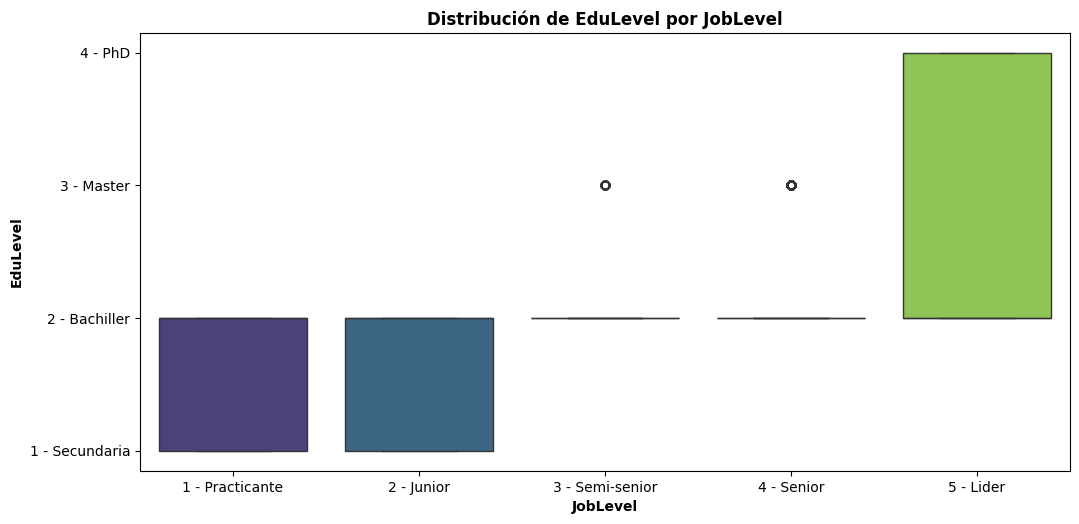

In [7]:
#Trabajare sobre un df_temp
df_temp = df.copy()


# Crear mapeos de categorías originales a numéricas
edu_levels_mapping = df_temp[['EduLevel', 'EduLevel_categoria']].drop_duplicates().sort_values('EduLevel_categoria')
job_levels_mapping = df_temp[['JobLevel', 'JobLevel_categoria']].drop_duplicates().sort_values('JobLevel_categoria')

# Crear mapeos de los valores numéricos a categorías originales
edu_levels_rev_mapping = edu_levels_mapping.set_index('EduLevel_categoria')['EduLevel'].to_dict()
job_levels_rev_mapping = job_levels_mapping.set_index('JobLevel_categoria')['JobLevel'].to_dict()

# Crear el gráfico de caja
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='JobLevel_categoria', y='EduLevel_categoria', data=df_temp, palette='viridis')

# Ajustar los detalles del gráfico
plt.title('Distribución de EduLevel por JobLevel', fontweight='bold')
plt.xlabel('JobLevel', fontweight='bold')
plt.ylabel('EduLevel', fontweight='bold')

# Obtener valores únicos y ordenados para los ticks del eje x
job_level_ticks = sorted(df_temp['JobLevel_categoria'].unique())
# Desplazar los ticks del eje x a la izquierda
adjusted_ticks = [tick - 1 for tick in job_level_ticks]

# Reemplazar etiquetas del eje x con categorías originales
ax.set_xticks(adjusted_ticks)
ax.set_xticklabels([job_levels_rev_mapping[i] for i in job_level_ticks])

# Reemplazar etiquetas del eje y con categorías originales
edu_level_ticks = sorted(df_temp['EduLevel_categoria'].unique())
ax.set_yticks(edu_level_ticks)
ax.set_yticklabels([edu_levels_rev_mapping[i] for i in edu_level_ticks])

# Ajustar el margen inferior para dar más espacio a las etiquetas del eje x
plt.subplots_adjust(bottom=0.15)

# Quitar las líneas de cuadrícula
plt.grid(False)

plt.show()


En efecto se ve relación del Nivel de educación con el puesto de trabajo.

## Nivel Educativo vs Nivel de trabajo

En base a la segunda hipótesis (Por políticas de igualdad de género, la diferencia entre el nivel de satisfacción entre hombres y mujeres debe ser menor a 5%.), Graficare si existe relación entre ambas.

In [8]:
## Creo la columnas numerica que categoricen Gender
# Obtener los valores únicos de la columna Gender
unique_genders = df['Gender'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
gender_category_mapping = {gender: idx + 1 for idx, gender in enumerate(unique_genders)}

# Crear una nueva columna Gender_categoria utilizando el diccionario de mapeo
df['Gender_categoria'] = df['Gender'].map(gender_category_mapping)


In [9]:
#Imprimo la relacion Gender_categoria y Gender
# Seleccionar solo las columnas Gender_categoria y Gender y eliminar duplicados
result_df = df[['Gender_categoria', 'Gender']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))


 Gender_categoria    Gender
                1 Masculino
                2  Femenino
                3     Otros


In [10]:
# Mostrar los valores únicos y los primeros registros del DataFrame para verificar
df.head()


,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction,EduLevel_categoria,JobLevel_categoria,Gender_categoria
0,6,Masculino,32,Casado,3 - Semi-senior,7,TI,Full-Time,1,1,...,3,12,0,2 - Bachiller,True,33.5,5,2,3,1
1,11,Femenino,34,Casado,3 - Semi-senior,12,Finanzas,Full-Time,1,1,...,4,11,0,2 - Bachiller,False,36.0,5,2,3,2
2,33,Femenino,23,soltero,1 - Practicante,1,Marketing,Full-Time,2,4,...,0,30,0,2 - Bachiller,True,10.5,5,2,1,2
3,20,Femenino,29,Casado,2 - Junior,6,TI,Contrato,2,2,...,2,9,0,2 - Bachiller,True,23.0,5,2,2,2
4,28,Otros,23,soltero,2 - Junior,1,Ventas,Part-Time,3,1,...,0,7,0,2 - Bachiller,False,20.5,5,2,2,3


### Gráfico de cajas

C:\Users\carlo\AppData\Local\Temp\ipykernel_624\3153499674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='JobSatisfaction', data=df, palette='viridis', showmeans=True)


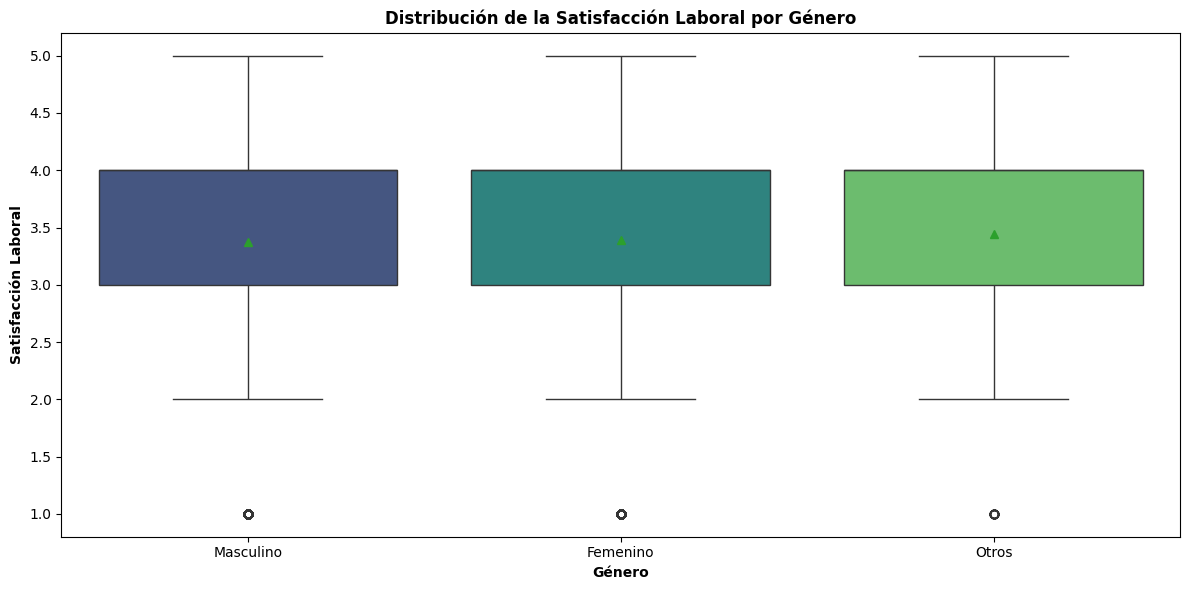

In [11]:
# Crear el gráfico de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='JobSatisfaction', data=df, palette='viridis', showmeans=True)
    
# Configurar el título y las etiquetas
plt.title('Distribución de la Satisfacción Laboral por Género', fontweight='bold')
plt.xlabel('Género', fontweight='bold')
plt.ylabel('Satisfacción Laboral', fontweight='bold')
    
# Eliminar las gridlines
plt.grid(False)
    
# Mostrar el gráfico
plt.tight_layout()  # Ajusta el diseño para que se ajuste a la figura
plt.show()

Se demuestra que es similar, por lo que la segunda hipótesis tambien es verdadera.

## JobLevel vs Overtime

Según la tercera hipótesis, Los trabajos de mayor rango (JobLevel: Senior y Lider) tienen más sobretiempo en promedio. Ello se comprobrará a continuación.

In [12]:
# Contar la cantidad de True y False para cada JobLevel
counts = df.groupby(['JobLevel', 'haveOT']).size().unstack(fill_value=0)

# Calcular los porcentajes
percentages = counts.divide(counts.sum(axis=1), axis=0) * 100
percentages = percentages.round(2)

# Combinar los conteos y porcentajes en un solo DataFrame
summary = pd.concat([counts, percentages], axis=1, keys=['Cantidad', 'Porcentajes'])

In [13]:
summary

Cantidad       Porcentajes       
haveOT             False True        False  True 
JobLevel                                         
1 - Practicante      144    58       71.29  28.71
2 - Junior           420   182       69.77  30.23
3 - Semi-senior      511   255       66.71  33.29
4 - Senior           747   322       69.88  30.12
5 - Lider            267   119       69.17  30.83

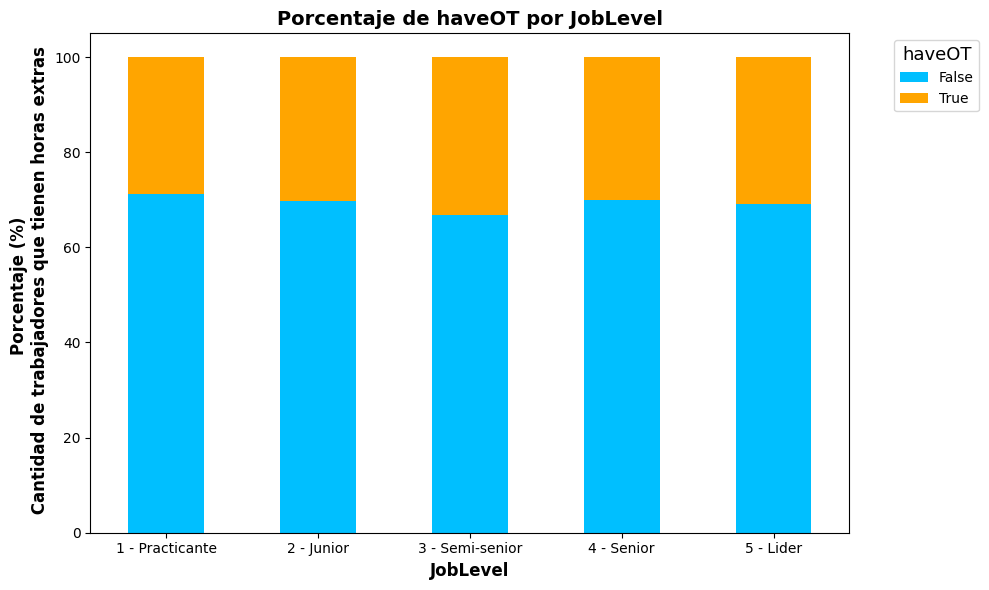

In [14]:
## Crear gráfico de barras apiladas
ax = percentages.plot(kind='bar', stacked=True, color=['#00BFFF', '#FFA500'], figsize=(10, 6))

# Configuración de los títulos y etiquetas
plt.title('Porcentaje de haveOT por JobLevel', fontsize=14, fontweight='bold')
plt.xlabel('JobLevel', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje (%) \n Cantidad de trabajadores que tienen horas extras', fontsize=12, fontweight='bold')

# Configurar las etiquetas del eje x para que no se roten
plt.xticks(rotation=0)

# Mostrar la leyenda a la derecha
plt.legend(title='haveOT', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout para que no se corte la leyenda
plt.tight_layout()

# Mostrar el gráfico
plt.show()

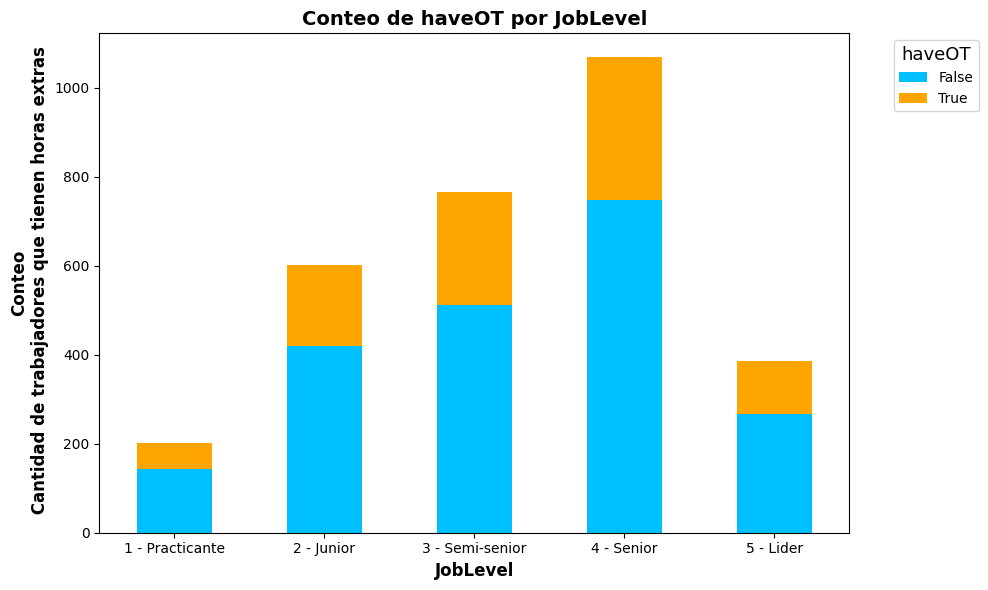

In [15]:
## Crear gráfico de barras apiladas
ax = counts.plot(kind='bar', stacked=True, color=['#00BFFF', '#FFA500'], figsize=(10, 6))

# Configuración de los títulos y etiquetas
plt.title('Conteo de haveOT por JobLevel', fontsize=14, fontweight='bold')
plt.xlabel('JobLevel', fontsize=12, fontweight='bold')
plt.ylabel('Conteo\n Cantidad de trabajadores que tienen horas extras', fontsize=12, fontweight='bold')

# Configurar las etiquetas del eje x para que no se roten
plt.xticks(rotation=0)

# Mostrar la leyenda a la derecha
plt.legend(title='haveOT', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout para que no se corte la leyenda
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se ve que se entrevistaron más seniors. Pero porcentualemnte el nivel de satisfacción es igual independientemente del puesto. Por tanto, la tercera hipótesis es falsa.

## Headmap de correlación

Para corroborar, haré un headmap de correlación. 
Como primer paso creare las variable categoricas (númericas) de aquellos que tienen valores textuales o alfanumericos.

In [16]:
print(df.dtypes)

EmpID                      int64
Gender                    object
Age                        int64
MaritalStatus             object
JobLevel                  object
Experience                 int64
Dept                      object
EmpType                   object
WLB                        int64
WorkEnv                    int64
PhysicalActivityHours    float64
Workload                   int64
Stress                     int64
SleepHours               float64
CommuteMode               object
CommuteDistance            int64
NumCompanies               int64
TeamSize                   int64
NumReports                 int64
EduLevel                  object
haveOT                      bool
TrainingHoursPerYear     float64
JobSatisfaction            int64
EduLevel_categoria         int64
JobLevel_categoria         int64
Gender_categoria           int64
dtype: object


In [17]:
## Creo la columnas numerica que categoricen MaritalStatus
# Obtener los valores únicos de la columna MaritalStatus
unique_MaritalStatus = df['MaritalStatus'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
MaritalStatus_category_mapping = {MaritalStatus: idx + 1 for idx, MaritalStatus in enumerate(unique_MaritalStatus)}

# Crear una nueva columna MaritalStatus_categoria utilizando el diccionario de mapeo
df['MaritalStatus_categoria'] = df['MaritalStatus'].map(MaritalStatus_category_mapping)

#Imprimo la relacion MaritalStatus_categoria y MaritalStatus
# Seleccionar solo las columnas MaritalStatus_categoria y MaritalStatus y eliminar duplicados
result_df = df[['MaritalStatus_categoria', 'MaritalStatus']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))

 MaritalStatus_categoria MaritalStatus
                       1        Casado
                       2       soltero
                       3    Divorciado
                       4         Viudo


In [18]:

## Creo la columnas numerica que categoricen Dept
# Obtener los valores únicos de la columna Dept
unique_Dept = df['Dept'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
Dept_category_mapping = {Dept: idx + 1 for idx, Dept in enumerate(unique_Dept)}

# Crear una nueva columna Dept_categoria utilizando el diccionario de mapeo
df['Dept_categoria'] = df['Dept'].map(Dept_category_mapping)

#Imprimo la relacion Dept_categoria y Dept
# Seleccionar solo las columnas Dept_categoria y Dept y eliminar duplicados
result_df = df[['Dept_categoria', 'Dept']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))


 Dept_categoria                Dept
              1                  TI
              2            Finanzas
              3           Marketing
              4              Ventas
              5         Operaciones
              6 Servicio al cliente
              7               Legal
              8    Recursos Humanos


In [19]:
## Creo la columnas numerica que categoricen EmpType
# Obtener los valores únicos de la columna EmpType
unique_EmpType = df['EmpType'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
EmpType_category_mapping = {EmpType: idx + 1 for idx, EmpType in enumerate(unique_EmpType)}

# Crear una nueva columna EmpType_categoria utilizando el diccionario de mapeo
df['EmpType_categoria'] = df['EmpType'].map(EmpType_category_mapping)

#Imprimo la relacion EmpType_categoria y EmpType
# Seleccionar solo las columnas EmpType_categoria y EmpType y eliminar duplicados
result_df = df[['EmpType_categoria', 'EmpType']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))

 EmpType_categoria   EmpType
                 1 Full-Time
                 2  Contrato
                 3 Part-Time


In [20]:

## Creo la columnas numerica que categoricen CommuteMode
# Obtener los valores únicos de la columna CommuteMode
unique_CommuteMode = df['CommuteMode'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
CommuteMode_category_mapping = {CommuteMode: idx + 1 for idx, CommuteMode in enumerate(unique_CommuteMode)}

# Crear una nueva columna CommuteMode_categoria utilizando el diccionario de mapeo
df['CommuteMode_categoria'] = df['CommuteMode'].map(CommuteMode_category_mapping)

#Imprimo la relacion CommuteMode_categoria y CommuteMode
# Seleccionar solo las columnas CommuteMode_categoria y CommuteMode y eliminar duplicados
result_df = df[['CommuteMode_categoria', 'CommuteMode']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))

 CommuteMode_categoria        CommuteMode
                     1              Carro
                     2               Moto
                     3 Transporte Público
                     4          Bicicleta
                     5             Camina


In [21]:
## Creo la columnas numerica que categoricen haveOT
# Obtener los valores únicos de la columna haveOT
unique_haveOT = df['haveOT'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
haveOT_category_mapping = {haveOT: idx + 1 for idx, haveOT in enumerate(unique_haveOT)}

# Crear una nueva columna haveOT_categoria utilizando el diccionario de mapeo
df['haveOT_categoria'] = df['haveOT'].map(haveOT_category_mapping)

#Imprimo la relacion haveOT_categoria y haveOT
# Seleccionar solo las columnas haveOT_categoria y haveOT y eliminar duplicados
result_df = df[['haveOT_categoria', 'haveOT']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))


 haveOT_categoria  haveOT
                1    True
                2   False


In [22]:
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,TrainingHoursPerYear,JobSatisfaction,EduLevel_categoria,JobLevel_categoria,Gender_categoria,MaritalStatus_categoria,Dept_categoria,EmpType_categoria,CommuteMode_categoria,haveOT_categoria
0,6,Masculino,32,Casado,3 - Semi-senior,7,TI,Full-Time,1,1,...,33.5,5,2,3,1,1,1,1,1,1
1,11,Femenino,34,Casado,3 - Semi-senior,12,Finanzas,Full-Time,1,1,...,36.0,5,2,3,2,1,2,1,1,2
2,33,Femenino,23,soltero,1 - Practicante,1,Marketing,Full-Time,2,4,...,10.5,5,2,1,2,2,3,1,2,1
3,20,Femenino,29,Casado,2 - Junior,6,TI,Contrato,2,2,...,23.0,5,2,2,2,1,1,2,3,1
4,28,Otros,23,soltero,2 - Junior,1,Ventas,Part-Time,3,1,...,20.5,5,2,2,3,2,4,3,1,2


In [23]:
## Ordenar columnas para que esten al lado de sus categorias
# Definir las primeras tres columnas deseadas
first_columns = ['EmpID', 'Gender', 'Age']

# Obtener las demás columnas y ordenarlas alfabéticamente
remaining_columns = [col for col in df.columns if col not in first_columns]
remaining_columns.sort()

# Crear el nuevo orden de columnas
new_column_order = first_columns + remaining_columns

# Reordenar las columnas del DataFrame
df = df[new_column_order]



In [24]:
df.head()

,EmpID,Gender,Age,CommuteDistance,CommuteMode,CommuteMode_categoria,Dept,Dept_categoria,EduLevel,EduLevel_categoria,...,PhysicalActivityHours,SleepHours,Stress,TeamSize,TrainingHoursPerYear,WLB,WorkEnv,Workload,haveOT,haveOT_categoria
0,6,Masculino,32,20,Carro,1,TI,1,2 - Bachiller,2,...,2.5,7.6,1,12,33.5,1,1,2,True,1
1,11,Femenino,34,15,Carro,1,Finanzas,2,2 - Bachiller,2,...,1.8,7.9,2,11,36.0,1,1,2,False,2
2,33,Femenino,23,17,Moto,2,Marketing,3,2 - Bachiller,2,...,2.1,6.5,4,30,10.5,2,4,5,True,1
3,20,Femenino,29,13,Transporte Público,3,TI,1,2 - Bachiller,2,...,1.9,7.5,1,9,23.0,2,2,3,True,1
4,28,Otros,23,20,Carro,1,Ventas,4,2 - Bachiller,2,...,3.7,4.9,1,7,20.5,3,1,2,False,2


In [25]:
## Crear un dataframe con solo los valores categoricos
# Crear una copia del DataFrame
df_solocategoricos = df.copy()

# Identificar las columnas que contienen valores numéricos
numeric_columns = df_solocategoricos.select_dtypes(include=['number']).columns

# Eliminar columnas que no contienen valores numéricos
df_solocategoricos = df_solocategoricos[numeric_columns]

# Crear df_solocategoricos2 sin la columna 'EmpID' (Ya que es ID, no se usarán para análisis)
df_solocategoricos2 = df_solocategoricos.drop(columns=['EmpID'])


In [26]:
df_solocategoricos2.head()

,Age,CommuteDistance,CommuteMode_categoria,Dept_categoria,EduLevel_categoria,EmpType_categoria,Experience,Gender_categoria,JobLevel_categoria,JobSatisfaction,...,NumReports,PhysicalActivityHours,SleepHours,Stress,TeamSize,TrainingHoursPerYear,WLB,WorkEnv,Workload,haveOT_categoria
0,32,20,1,1,2,1,7,1,3,5,...,0,2.5,7.6,1,12,33.5,1,1,2,1
1,34,15,1,2,2,1,12,2,3,5,...,0,1.8,7.9,2,11,36.0,1,1,2,2
2,23,17,2,3,2,1,1,2,1,5,...,0,2.1,6.5,4,30,10.5,2,4,5,1
3,29,13,3,1,2,2,6,2,2,5,...,0,1.9,7.5,1,9,23.0,2,2,3,1
4,23,20,1,4,2,3,1,3,2,5,...,0,3.7,4.9,1,7,20.5,3,1,2,2


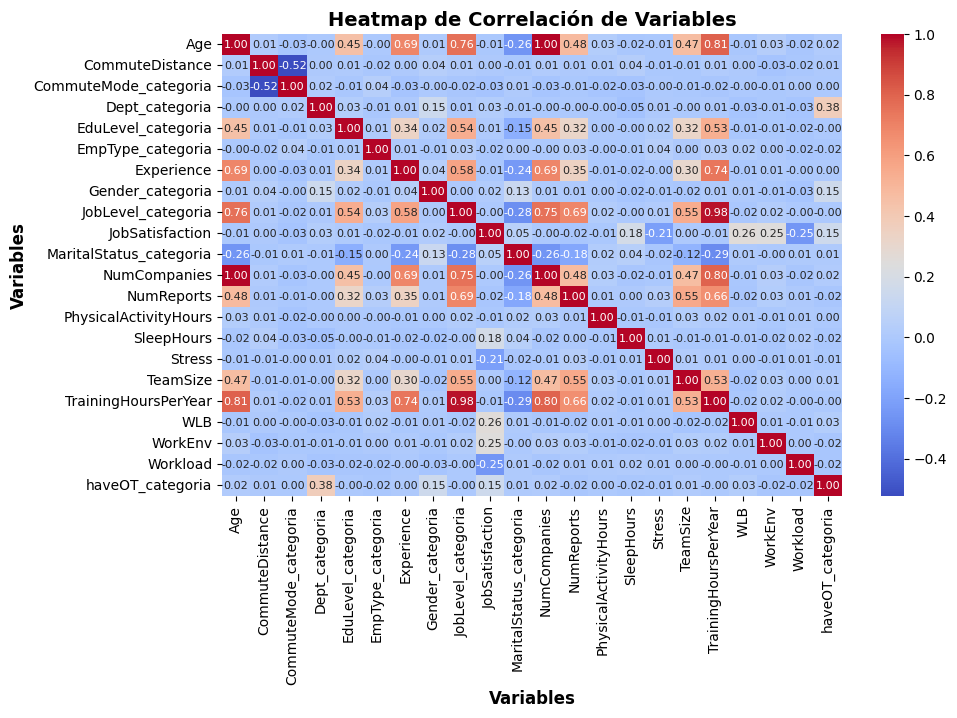

In [27]:
# Crear un heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(df_solocategoricos2.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Variables', fontsize=14, fontweight='bold')
plt.xlabel('Variables', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')

# Mostrar el heatmap
plt.show()

* Hipótesis a: JobLevel y EduLevel tiene una relacion de 0.54 (afecta medianamente, corrobora la hipótesis).
* Hipótesis b: Gender y JobSatisfaction tiene una relación de 0.02 (No tiene relación, tal como plantea la hipótesis. Se corrobora)
* Hipótesis c: JobLevel y HaveOT tiene una relación de 0 (No tiene relación, indicando que la hipótesis planteada es falsa).

# K-meas

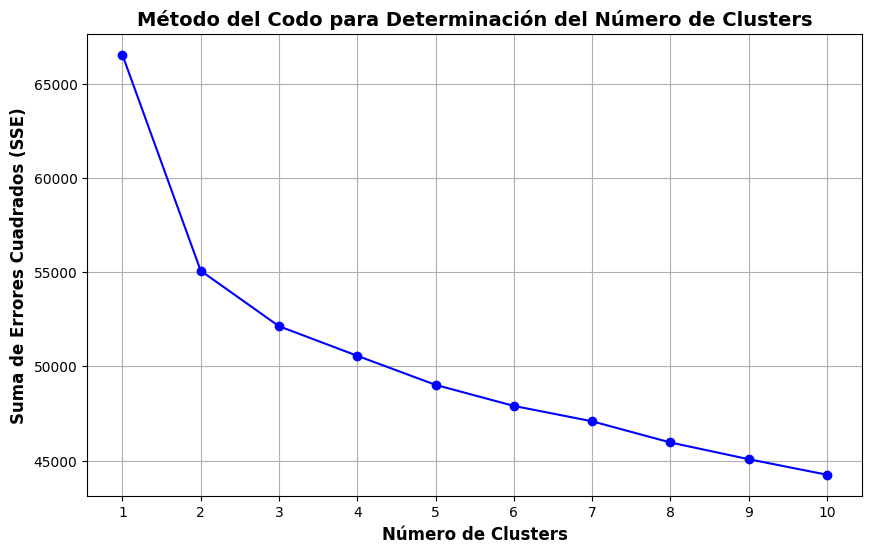

In [28]:
# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_solocategoricos2)

# Calcular la SSE para diferentes números de clusters
sse = []
k_values = range(1, 11)  # Evaluar entre 1 y 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Crear un gráfico de codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o', linestyle='-', color='b')
plt.title('Método del Codo para Determinación del Número de Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Número de Clusters', fontsize=12, fontweight='bold')
plt.ylabel('Suma de Errores Cuadrados (SSE)', fontsize=12, fontweight='bold')
plt.xticks(k_values)
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [29]:
## Crearé un tercer dataframe con las columnas que consideron más relevantes
# Crear df_solocategoricos3 con solo las columnas especificadas
df_solocategoricos3 = df_solocategoricos2[
    ['Age', 'EduLevel_categoria', 'EmpType_categoria', 'Experience', 
     'JobLevel_categoria', 'JobSatisfaction', 'MaritalStatus_categoria', 
     'haveOT_categoria']
]

# Mostrar las columnas de df_solocategoricos3
print(df_solocategoricos3.dtypes)

Age                        int64
EduLevel_categoria         int64
EmpType_categoria          int64
Experience                 int64
JobLevel_categoria         int64
JobSatisfaction            int64
MaritalStatus_categoria    int64
haveOT_categoria           int64
dtype: object


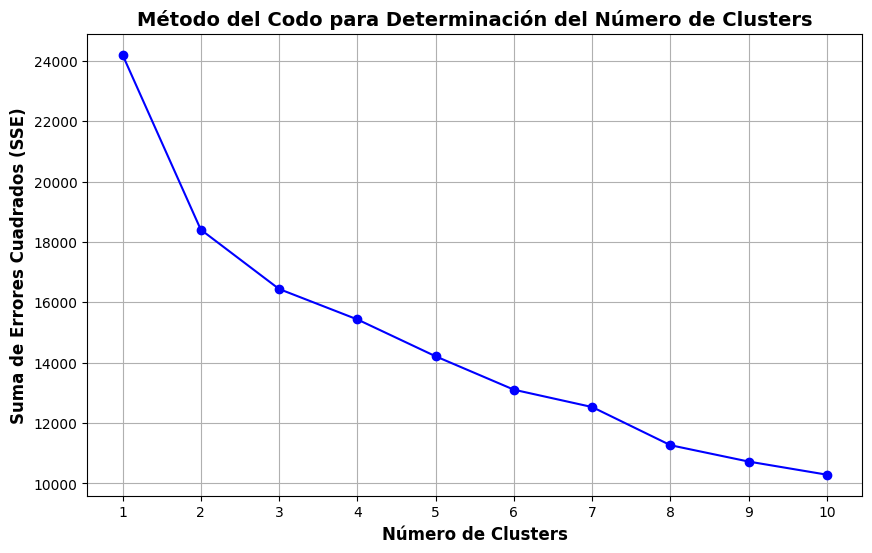

In [30]:
# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_solocategoricos3)

# Calcular la SSE para diferentes números de clusters
sse = []
k_values = range(1, 11)  # Evaluar entre 1 y 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Crear un gráfico de codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o', linestyle='-', color='b')
plt.title('Método del Codo para Determinación del Número de Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Número de Clusters', fontsize=12, fontweight='bold')
plt.ylabel('Suma de Errores Cuadrados (SSE)', fontsize=12, fontweight='bold')
plt.xticks(k_values)
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Conclusiones

* Hipótesis a, Mientras mayor es el nivel de estudios, mayor es el nivel de trabajo que tiene (JobLevel): Verdadero, a mayores estudios hay puestos más altos.
* Hipótesis b, Por políticas de igualdad de género, la diferencia entre el nivel de satisfacción entre hombres y mujeres debe ser menor a 5%: Verdadero, se comprobo que no hay relación de genero con satisfacción laboral.
* Hipótesis c, Los trabajos de mayor rango (JobLevel: Senior y Lider) tienen más sobretiempo en promedio: Falso, el sobre tiempo lo toma al rededor del 65 a 70% de empleados, sin importar su nivel.